Hackathon realizado na Ironhack em 18/10/2019, a equipe de dados era composta por Meire Nakamura e Mariana Zeferino.
O objetivo era fazer webscraping de vários sites de empresas de comidas congeladas, extrair insights para o lançamento de novo produto em conjunto com as equipes de UX e WebDev.
Cada equipe de dados fez o scrapping de um site. A junção, limpeza e análise foi individual por equipe. 

In [420]:
import requests
from bs4 import BeautifulSoup
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [193]:
categories = ['low-carb1','frango','sopas','vegetariano1']

In [194]:
def scraper_panelinha(word):
    url = 'https://panelinhafit.com.br/cardapio/pratos/' + str(word)
    data = requests.get(url)
    soup = BeautifulSoup(data.content, 'html.parser')
    categoria = word
    if categoria == 'low-carb1':
        categoria = 'low carb'
    elif categoria == 'vegetariano1':
        categoria = 'vegetariano'
    preço = soup.find_all('div', {'class' : 'valor valor-desconto new-price'})
    preço = [(item.get_text().lstrip('R').lstrip('$')) for item in preço]
    nome_comp = soup.find_all('h5', {'class' : 'nome-produto'})
    nome_comp = [item.get_text() for item in nome_comp]
    table = pd.DataFrame({'Preço (R$)': preço, 'Nome/Composição': nome_comp, 'Categoria': categoria})
    return table

In [195]:
scraper_panelinha('vegetariano1')

,Preço (R$),Nome/Composição,Categoria
0,"17,50",Strogonoff de shimeji com palmito + Arroz parb...,vegetariano
1,"13,00",Panqueca integral de palmito 150g,vegetariano
2,"15,00",Nhoque de batata doce com espinafre + Molho fu...,vegetariano
3,"11,00",nhoque de batata doce com espinafre + molho ve...,vegetariano


In [196]:
df = pd.DataFrame(columns = ['Preço (R$)', 'Nome/Composição', 'Categoria'])

for cat in categories:
    df = df.append(scraper_panelinha(cat))

In [197]:
df= df.reset_index(drop=True)
df

,Preço (R$),Nome/Composição,Categoria
0,"20,50",Carne de Panela na cerveja + Purê de mandioquinha,low carb
1,"21,00",Carne de Panela na cerveja + Mix de legumes 250g,low carb
2,"18,00",Patinho + Vagem 200g,low carb
3,"17,90",Patinho + Brócolis 200g,low carb
4,"20,50",Salmão + Purê de mandioquinha 200g,low carb
5,"13,50",Frango desfiado + purê de mandioquinha 200g,low carb
6,"13,90",Frango desfiado + Brócolis 200g,low carb
7,"14,00",Frango desfiado + Mix de legumes 200g,low carb
8,"17,00",Frango em cubos + abobrinha 200g,low carb
9,"18,50",Hambúrguer de patinho + Purê de mandioquinha 200g,low carb


Valores em promoção mudam a tag e por causa disso não deu pra usar a função nas categorias carne vermelha e peixe.
Então fizemos manualmente:

In [198]:
url='https://panelinhafit.com.br/cardapio/pratos/carne-vermelha'
page = requests.get(url)
soup=BeautifulSoup(page.content,'html.parser')
title=soup.find_all('h5',class_="nome-produto")

meal = [row.text.strip().split("\n") for row in title]
meal=pd.DataFrame(meal)
meal.drop(index=[5,9], inplace=True)
meal.reset_index(drop=True, inplace=True)

pr=soup.find_all('div',class_="valor valor-desconto new-price")
price = [(item.get_text().lstrip('R').lstrip('$')) for item in pr] #nova forma

price=pd.DataFrame(price)
price
price.drop(index=8, inplace=True)

price.reset_index(drop=True, inplace=True)

df2=pd.concat([price, meal], axis=1)
df2.columns=['Preço (R$)','Nome/Composição']
df2

df2['Categoria'] = 'carne vermelha'

In [199]:
url2='https://panelinhafit.com.br/cardapio/pratos/peixe'
page2 = requests.get(url2)
soup2=BeautifulSoup(page2.content,'html.parser')

title2=soup2.find_all('h5',class_="nome-produto")

meal2 = [row.text.strip().split("\n") for row in title2]
meal2=pd.DataFrame(meal2)
meal2.drop(index=0, inplace=True)
meal2.reset_index(drop=True, inplace=True)

pr2=soup2.find_all('div',class_="valor valor-desconto new-price")
price2 = [(item.get_text().lstrip('R').lstrip('$')) for item in pr2]
price2=pd.DataFrame(price2)

df3=pd.concat([price2, meal2], axis=1)
df3.columns=['Preço (R$)','Nome/Composição']

df3['Categoria'] = 'peixe'

In [201]:
df_final = pd.concat([df, df2, df3], axis=0)
df_final

,Preço (R$),Nome/Composição,Categoria
0,"20,50",Carne de Panela na cerveja + Purê de mandioquinha,low carb
1,"21,00",Carne de Panela na cerveja + Mix de legumes 250g,low carb
2,"18,00",Patinho + Vagem 200g,low carb
3,"17,90",Patinho + Brócolis 200g,low carb
4,"20,50",Salmão + Purê de mandioquinha 200g,low carb
5,"13,50",Frango desfiado + purê de mandioquinha 200g,low carb
6,"13,90",Frango desfiado + Brócolis 200g,low carb
7,"14,00",Frango desfiado + Mix de legumes 200g,low carb
8,"17,00",Frango em cubos + abobrinha 200g,low carb
9,"18,50",Hambúrguer de patinho + Purê de mandioquinha 200g,low carb


Limpeza dos dados:

In [202]:
def peso(x):
    pe = re.findall('\d+',x)
    try :
        pe2 = pe[0]
        return int(pe[0])
    except: 
        return 0
    
df_final['Peso']= df_final['Nome/Composição'].apply(peso)
df_final['Nome/Composição'].replace('\d\w','', regex=True, inplace=True)

In [203]:
df_final['Preço (R$)'].replace(',','.', regex=True, inplace=True)

In [204]:
df_final.reset_index(drop=True, inplace=True)

In [205]:
df_final['Preço (R$)'] = df_final['Preço (R$)'].astype(float)

In [206]:
df_final.columns=['Preço', 'Prato', 'Categoria', 'Peso']

In [225]:
df_final['Fonte'] = 'panelinha fit'
df_final.head()

,Preço,Prato,Categoria,Peso,Fonte
0,20.5,Carne de Panela na cerveja + Purê de mandioquinha,low carb,0,panelinha fit
1,21.0,Carne de Panela na cerveja + Mix de legumes,low carb,250,panelinha fit
2,18.0,Patinho + Vagem,low carb,200,panelinha fit
3,17.9,Patinho + Brócolis,low carb,200,panelinha fit
4,20.5,Salmão + Purê de mandioquinha,low carb,200,panelinha fit


In [226]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
Preço        60 non-null float64
Prato        60 non-null object
Categoria    60 non-null object
Peso         60 non-null int64
Fonte        60 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 1.7+ KB


In [209]:
df_final.to_csv('panelinha_fit.csv', sep = ';', encoding='utf-8', index_label = False)

## Juntando todas as análises em um dataset único

Cada grupo fez Web Scraping de um site. Abaixo juntamos todos os csv.

In [243]:
luccofit = pd.read_csv('luccofit.csv', sep = ';')
luccofit.drop(['posi', 'link', 'ingredientes'], axis = 1, inplace = True)
luccofit.head()

,Prato,Preço,Fonte,Peso,Calorias
0,Quibe Recheado Com Ricota Coberto com Amêndoas...,14.90,luccofit,150,274kc
1,Burguer de Patinho com Purê de Mandioquinha - ...,17.50,luccofit,200g,244 Kcal = 1024 Kj
2,Crepioca de frango,9.90,luccofit,100g (1 porção),211 kcal = 882 Kj
3,Crepioca de Marguerita,9.90,luccofit,100g (1 porção),211kcal = 882Kj
4,Escondidinho de carne com mandioca - 250g,16.74,luccofit,250g (1 porção),359kc


In [259]:
luccofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
Prato       92 non-null object
Preço       92 non-null float64
Fonte       92 non-null object
Peso        92 non-null int64
Calorias    82 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ KB


In [260]:
def peso(x):
    try :
        pe = re.findall('\d+',x)
        pe2 = pe[0]
        return int(pe[0])
    except: 
        return 0

luccofit['Peso'] = luccofit['Peso'].apply(peso)
luccofit['Calorias'] = luccofit['Calorias'].apply(peso)

In [269]:
luccofit.head()

,Prato,Preço,Fonte,Peso,Calorias
0,Quibe Recheado Com Ricota Coberto com Amêndoas...,14.90,luccofit,150,274
1,Burguer de Patinho com Purê de Mandioquinha - ...,17.50,luccofit,200,244
2,Crepioca de frango,9.90,luccofit,100,211
3,Crepioca de Marguerita,9.90,luccofit,100,211
4,Escondidinho de carne com mandioca - 250g,16.74,luccofit,250,359


In [296]:
livup=pd.read_csv('livup.csv', sep=';')
livup.head()

,Prato,Acompanhamento,Calorias,Peso,Preço,Categoria,Mais pedido,Fonte
0,Hamburguer de fraldinha batata assada com lemo...,Batata assada com lemon pepper e Mix de legume...,415.0,320.0,24.3,Carnes vermelhas,0,livup
1,Almondega de carne com molho de tomate arroz d...,Abobrinha com tomate e Arroz de couve-flor com...,363.0,360.0,21.3,Carnes vermelhas,0,livup
2,Kafta arroz de pupunha com legumes brocolis no...,Brócolis no vapor e Arroz de pupunha com legumes,351.0,320.0,23.7,Carnes vermelhas,0,livup
3,File mignon suino com molho provencal risoto d...,Risoto de limão siciliano e Cenoura com mostar...,507.0,370.0,22.3,Carnes vermelhas,0,livup
4,Prato comida congelada hamburguer de fraldinha...,Batata rústica com alecrim e Mix de legumes no...,374.0,320.0,24.3,Carnes vermelhas,0,livup


In [297]:
livup.replace(['Carnes vermelhas','Frangos','Massas','Peixes e frutos do mar','Vegetarianos'],
              ['carne vermelha','frango','massa','peixe','vegetariano'], inplace=True)

In [301]:
livup.drop(['Acompanhamento','Mais pedido'],axis=1, inplace=True)

In [302]:
livup.head()

,Prato,Calorias,Peso,Preço,Categoria,Fonte
0,Hamburguer de fraldinha batata assada com lemo...,415.0,320.0,24.3,carne vermelha,livup
1,Almondega de carne com molho de tomate arroz d...,363.0,360.0,21.3,carne vermelha,livup
2,Kafta arroz de pupunha com legumes brocolis no...,351.0,320.0,23.7,carne vermelha,livup
3,File mignon suino com molho provencal risoto d...,507.0,370.0,22.3,carne vermelha,livup
4,Prato comida congelada hamburguer de fraldinha...,374.0,320.0,24.3,carne vermelha,livup


In [383]:
leve=pd.read_csv('leve.csv', sep=';')
leve.head()

,Prato,Peso,Preço,Fonte
0,Kit Saladas (04 saladas),0g,"59,90",Leve Chef
1,Kit Saladas (08 saladas),0g,"99,90",Leve Chef
2,Kit Semana Almoço e Jantar - 21/Out (10 Refei...,0g,"151,80",Leve Chef
3,Kit Semana Fit Almoço e Jantar Saladas - 21/...,0g,"145,80",Leve Chef
4,Kit Semana Low Carb - 14/Out (10 Refeições),0g,"139,90",Leve Chef


In [384]:
leve.drop([0,1,2,3,4,5], axis=0, inplace=True)
leve.reset_index(drop=True, inplace=True)
leve.rename(columns={'Pratos':'Prato'}, inplace=True)

In [385]:
leve['Peso'] = leve['Peso'].apply(peso)

In [386]:
leve['Preço'].replace(',','.', regex=True, inplace=True)

In [388]:
leve['Preço'] = leve['Preço'].astype(float)

In [389]:
leve.head()

,Prato,Peso,Preço,Fonte
0,Lagarto ao Molho Madeira (somente proteína),250,29.9,Leve Chef
1,Salada de Salpicão de Frango,200,18.9,Leve Chef
2,Salada de Tabule de Quinoa,200,16.9,Leve Chef
3,Salada de Arroz Negro com Frango,200,18.9,Leve Chef
4,"Carne ao Molho de Cerveja Preta, Mix de Legume...",265,22.9,Leve Chef


In [390]:
chef=pd.read_csv('chefcongelados.csv', sep=';')
chef.head()

,Preço,Prato,Categoria,Fonte
0,28.5,"Moqueca de Palmito Natural com Legumes, Soja M...",vegetarianos,chefcongelados
1,28.5,Kibe de Abóbora e Quinua com Legumes ao Curry ...,vegetarianos,chefcongelados
2,28.5,Strogonoff de Palmito e Arroz Integral com Batata,vegetarianos,chefcongelados
3,28.5,Bife de Berinjela c/ Bolognesa de Lentilha e ...,vegetarianos,chefcongelados
4,28.5,Escondidinho de Batata Doce e Baião de Dois,vegetarianos,chefcongelados


In [391]:
chef.replace(['vegetarianos', 'sem-gluten', 'seleção-saudaveis', 'low-carb','seleção-do-chef'],
             ['vegetariano','sem gluten','saudavel','low carb','do chef'], inplace=True)

In [392]:
chef.head()

,Preço,Prato,Categoria,Fonte
0,28.5,"Moqueca de Palmito Natural com Legumes, Soja M...",vegetariano,chefcongelados
1,28.5,Kibe de Abóbora e Quinua com Legumes ao Curry ...,vegetariano,chefcongelados
2,28.5,Strogonoff de Palmito e Arroz Integral com Batata,vegetariano,chefcongelados
3,28.5,Bife de Berinjela c/ Bolognesa de Lentilha e ...,vegetariano,chefcongelados
4,28.5,Escondidinho de Batata Doce e Baião de Dois,vegetariano,chefcongelados


In [394]:
keeplight=pd.read_csv('keeplight.csv',sep=';')
keeplight['Fonte']='keeplight'
keeplight.rename(columns={'Nome':'Prato'}, inplace=True)
keeplight.head()

,Prato,Calorias,Preço,Fonte
0,Escondidinho de Frango e Batata Doce,231.0,26.0,keeplight
1,Estrogonofe de Frango Proteico,271.0,28.0,keeplight
2,Filé de Frango com Abobrinha Proteico,200.0,28.0,keeplight
3,Frango à Caçadora,200.0,29.0,keeplight
4,Frango à Parmegiana,223.0,29.0,keeplight


In [397]:
beleaf=pd.read_csv('beleaf.csv', sep=';')
beleaf.head()

,Prato,Acompanhameto,Preço,Fonte
0,BURRITO BOWL,"Milho verde, tomate, cenoura e repolho roxo",19.9,Beleaf
1,ASIA WOK,Molho de laranja e arroz de jasmim,19.9,Beleaf
2,TUTU MINEIRO DE FEIJÃO PRETO,"Molho acebolado, arroz cateto integral e couve...",19.9,Beleaf
3,LASANHA BOLONHESA DO FUTURO™,Mussarela de castanhas,28.9,Beleaf
4,NHOQUE DE BATATAS COM SHIITAKE E ESPINAFRE,Molho de castanha de caju e mostarda dijon,26.3,Beleaf


In [406]:
beleaf['Prato']=beleaf['Prato']+' + '+beleaf['Acompanhameto']
beleaf.drop(['Acompanhameto'], axis=1, inplace=True)
beleaf.head()

,Prato,Preço,Fonte
0,"BURRITO BOWL + Milho verde, tomate, cenoura e ...",19.9,Beleaf
1,ASIA WOK + Molho de laranja e arroz de jasmim ...,19.9,Beleaf
2,TUTU MINEIRO DE FEIJÃO PRETO + Molho acebolado...,19.9,Beleaf
3,LASANHA BOLONHESA DO FUTURO™ + Mussarela de ca...,28.9,Beleaf
4,NHOQUE DE BATATAS COM SHIITAKE E ESPINAFRE + M...,26.3,Beleaf


In [407]:
concorrentes = pd.concat([df_final, chef, livup, keeplight, beleaf, luccofit, leve], sort=False)
concorrentes.head()

,Preço,Prato,Categoria,Peso,Fonte,Calorias
0,20.5,Carne de Panela na cerveja + Purê de mandioquinha,low carb,0.0,panelinha fit,NaN
1,21.0,Carne de Panela na cerveja + Mix de legumes,low carb,250.0,panelinha fit,NaN
2,18.0,Patinho + Vagem,low carb,200.0,panelinha fit,NaN
3,17.9,Patinho + Brócolis,low carb,200.0,panelinha fit,NaN
4,20.5,Salmão + Purê de mandioquinha,low carb,200.0,panelinha fit,NaN


In [408]:
concorrentes.to_csv('concorrentes.csv', sep = ';', encoding='utf-8', index_label = False)

## Analise exploratória do dataset final - Escolha do produto

Análise incluindo 7 concorrentes e 464 pratos
(livup: 106, luccofit: 92, chefcongelados: 70, keeplight: 65, panelinha fit: 60, Leve Chef: 51, Beleaf: 20)

In [418]:
concorrentes.reset_index(drop=True, inplace=True)
concorrentes.head()

,Preço,Prato,Categoria,Peso,Fonte,Calorias
0,20.5,Carne de Panela na cerveja + Purê de mandioquinha,low carb,0.0,panelinha fit,NaN
1,21.0,Carne de Panela na cerveja + Mix de legumes,low carb,250.0,panelinha fit,NaN
2,18.0,Patinho + Vagem,low carb,200.0,panelinha fit,NaN
3,17.9,Patinho + Brócolis,low carb,200.0,panelinha fit,NaN
4,20.5,Salmão + Purê de mandioquinha,low carb,200.0,panelinha fit,NaN


In [412]:
concorrentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 50
Data columns (total 6 columns):
Preço        464 non-null float64
Prato        464 non-null object
Categoria    236 non-null object
Peso         309 non-null float64
Fonte        464 non-null object
Calorias     263 non-null float64
dtypes: float64(3), object(3)
memory usage: 27.9+ KB


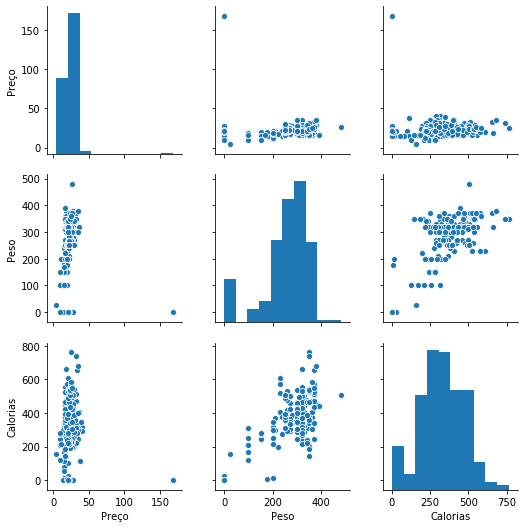

In [426]:
sns.pairplot(concorrentes);

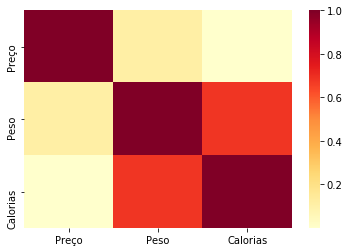

In [427]:
sns.heatmap(concorrentes.corr(),cmap="YlOrRd");

# alta correlação entre peso e calorias 

In [410]:
concorrentes.pivot_table(values='Preço', columns='Categoria', aggfunc={np.mean, 'max', 'min'})

Categoria,carne vermelha,do chef,frango,low carb,massa,peixe,saudavel,sem gluten,sopas,vegetariano
max,33.300000,35.900000,27.700000,38.900000,20.40,35.70000,35.90,28.90,18.5,34.500000
mean,21.545238,34.290909,18.678788,22.678125,18.02,25.49697,27.54,23.35,18.5,22.984615
min,12.000000,32.800000,10.000000,13.500000,14.80,16.00000,22.50,11.40,18.5,11.000000


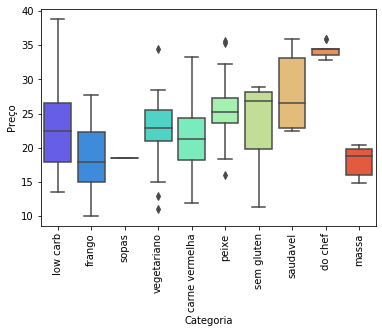

In [422]:
sns.boxplot(x="Categoria", y="Preço", data = concorrentes,palette='rainbow')
plt.xticks(rotation=90);

In [417]:
# foco no preço

concorrentes[concorrentes['Categoria']=='frango'].sort_values('Preço').head() #tail()

#frango mais barato: Panqueca integral 
#frango mais caro: Frango com crosta de castanha de caju risoto

,Preço,Prato,Categoria,Peso,Fonte,Calorias
171,23.9,Prato comida congelada frango parmesao batata ...,frango,330.0,livup,369.0
166,24.7,Prato comida congelada frango com crosta arroz...,frango,320.0,livup,506.0
173,25.7,Prato comida congelada frango ao molho parmesa...,frango,320.0,livup,285.0
163,27.3,Frango ao curry e curcuma batata assada com al...,frango,330.0,livup,503.0
160,27.7,Frango com crosta de castanha de caju risoto d...,frango,370.0,livup,531.0


Foco na categoria com mais pratos, mais comum (testar se é a mais vendida através de uma meta de quantidade de venda)

In [411]:
concorrentes['Categoria'].value_counts()
# carne vermelha 

carne vermelha    42
vegetariano       39
frango            33
peixe             33
low carb          32
saudavel          20
do chef           11
massa             10
sopas             10
sem gluten         6
Name: Categoria, dtype: int64

In [444]:
concorrentes[concorrentes['Peso'] > 0].mean()

Preço        21.395544
Peso        273.585965
Calorias    380.165775
dtype: float64

In [445]:
concorrentes.describe()

,Preço,Peso,Calorias
count,464.000000,309.000000,263.000000
mean,23.234116,252.336570,330.920152
std,9.062402,99.680415,144.910203
min,4.500000,0.000000,0.000000
25%,18.500000,200.000000,240.500000
50%,22.900000,265.000000,337.000000
75%,26.825000,320.000000,426.000000
max,168.000000,480.000000,762.000000


Oferecer um prato mais barato que a média e com maior peso que a média dos concorrentes

In [446]:
# analisando o peso dos pratos da categoria carne que são mais baratos
# marmita com pelo menos mais de 273 gramas (média dos concorrentes)

concorrentes.loc[(concorrentes['Categoria'] == 'carne vermelha') & 
                 (concorrentes['Peso'] > 273)].sort_values('Preço').head()

,Preço,Prato,Categoria,Peso,Fonte,Calorias
159,16.7,File mignon suino com molho provencal arroz in...,carne vermelha,360.0,livup,375.0
157,16.7,Kafta arroz integral feijao carioca + Arroz in...,carne vermelha,320.0,livup,556.0
156,17.3,Kafta pure de batata cenoura com mostarda e ba...,carne vermelha,310.0,livup,412.0
153,17.7,Almondega de carne com molho de tomate arroz ...,carne vermelha,360.0,livup,474.0
150,17.9,Prato comida congelada quibe assado arroz inte...,carne vermelha,310.0,livup,480.0


In [435]:
concorrentes['Prato'][157]

'Kafta arroz integral feijao carioca + Arroz integral e Feijão carioca'

#### Produto escolhido: Kafta, arroz integral e feijao carioca, 320 gramas, 556 calorias por R$ 16.7

## Analise do consumo do Brasil

In [447]:
ibge = pd.read_csv('tab1_1.csv', sep=';')

In [449]:
ibge.sort_values(by='Consumo alimentar médio per capita(g/dia) Total', ascending=False)

,Alimentos,Consumo alimentar médio per capita(g/dia) Total,Consumo alimentar médio per capita(g/dia) Masculino,Consumo alimentar médio per capita(g/dia) Feminino,Percentual de consumo fora do domicílio em relação ao total consumido (%) Total,Percentual de consumo fora do domicílio em relação ao total consumido (%) Masculino,Percentual de consumo fora do domicílio em relação ao total consumido (%) Feminino
4,Feijão,182.882871,223.141650,145.354926,12.198982,13.631694,10.148745
0,Arroz,160.301123,189.927183,132.684658,12.504075,13.935279,10.594389
50,Carne bovina,63.243339,73.536595,53.648296,16.569854,18.603027,13.971991
43,Pão de sal,53.019363,58.089447,48.293193,9.103742,9.764902,8.362410
53,Aves,36.512360,40.095095,33.172650,16.959463,18.570586,15.144223
42,Macarrão e preparações à base de macarrão,36.331691,40.340911,32.594424,15.509617,17.725574,12.953045
55,Peixes frescos e preparações,23.406325,26.254502,20.751346,10.848960,11.462633,10.125209
27,Laranja,20.576282,20.431003,20.711706,16.265228,17.912539,14.750469
3,Milho e preparações,20.351890,23.054569,17.832538,7.605098,8.593821,6.413548
26,Banana,18.573797,18.334093,18.797242,11.646363,12.400455,10.960742


Feijão, Arroz e Carne bovina são os alimentos mais consumidos em gramas por dia.
E são os alimentos presentes no nosso prato escolhido 